In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('train.csv')
df = df.drop(['textID','selected_text'], axis=1)
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [82]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

,0
text,0
sentiment,0


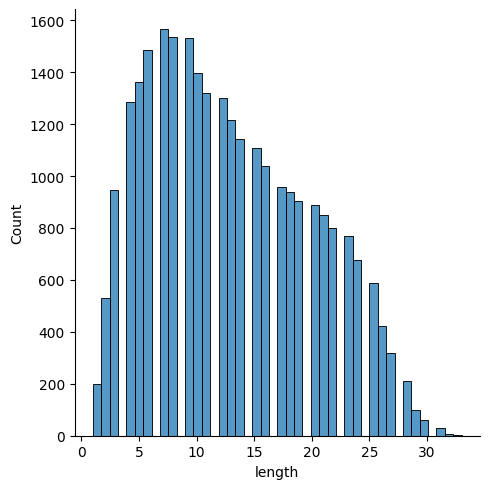

In [83]:
df['length'] = df.text.str.split().apply(len)
sns.displot(df['length'])

<Axes: xlabel='count', ylabel='sentiment'>

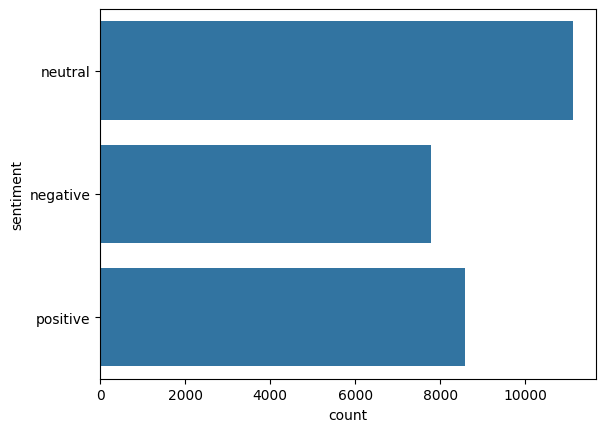

In [84]:
sns.countplot(df['sentiment'])

In [85]:
# df.sentiment = df.sentiment.replace({'positive': 2, 'neutral': 1, 'negative': 0})

In [86]:
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import string

class TweetCleaner:
    def __init__(self):
        self.tokenizer = TweetTokenizer(strip_handles=False, reduce_len=True)

    def remove_urls(self, text):
        """Remove URLs from text"""
        url_pattern = r'https?://\S+|www\.\S+'
        return re.sub(url_pattern, '', text)

    def remove_mentions(self, text):
        """Remove @ mentions from text"""
        mention_pattern = r'@\w+'
        return re.sub(mention_pattern, '', text)

    def clean_hashtags(self, text):
        """Remove # symbol but keep the hashtag text"""
        return re.sub(r'#(\w+)', r'\1', text)

    def remove_punctuation_and_numbers(self, text):
        """Remove punctuation and numbers"""
        text = re.sub(r'\d+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        return text

    def remove_stopwords(self, text):
        """Remove stopwords from text"""
        stop_words = set(stopwords.words('english'))
        tokens = self.tokenizer.tokenize(text)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        stemmer = PorterStemmer()
        stem_token = [stemmer.stem(word) for word in filtered_tokens]
        return ' '.join(stem_token)

    def clean_tweet(self, tweet):
        """Clean tweet text using all preprocessing steps"""
        tweet = tweet.lower()

        # Apply each cleaning step
        tweet = self.remove_urls(tweet)
        tweet = self.remove_mentions(tweet)
        tweet = self.clean_hashtags(tweet)
        tweet = self.remove_punctuation_and_numbers(tweet)
        tweet = self.remove_stopwords(tweet)

        return tweet

# Example usage
if __name__ == "__main__":
    cleaner = TweetCleaner()

    # Test tweet with various elements to clean
    sample_tweets = [
        "Check out this link https://example.com! @user #Python #coding is fun 123",
        "RT @developer: Just learned #DataScience at www.school.com - it's amazing!!!",
        "My temp is 98.6° @doctor #Health #Wellness",
        "@friend This is sooooo coooool! #awesome #technology https://t.co/123"
    ]

    print("Original vs Cleaned Tweets:\n")
    for tweet in sample_tweets:
        cleaned = cleaner.clean_tweet(tweet)
        print(f"Original: {tweet}")
        print(f"Cleaned:  {cleaned}")
        print()

Original vs Cleaned Tweets:

Original: Check out this link https://example.com! @user #Python #coding is fun 123
Cleaned:  check link python code fun

Original: RT @developer: Just learned #DataScience at www.school.com - it's amazing!!!
Cleaned:  rt learn datasci amaz

Original: My temp is 98.6° @doctor #Health #Wellness
Cleaned:  temp ° health well

Original: @friend This is sooooo coooool! #awesome #technology https://t.co/123
Cleaned:  sooo coool awesom technolog



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
cleaner = TweetCleaner()
df['clean_text'] = df['text'].apply(cleaner.clean_tweet)

In [88]:
X = df['clean_text']
y = df['sentiment']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [91]:
X_train.shape

(21984, 18227)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7081513828238719


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.74      0.59      0.66      1572
     neutral       0.67      0.74      0.70      2236
    positive       0.74      0.78      0.76      1688

    accuracy                           0.71      5496
   macro avg       0.72      0.70      0.71      5496
weighted avg       0.71      0.71      0.71      5496



In [104]:
text = 'it is not a bad day i enjoyed it'
cleaned = cleaner.clean_tweet(text)
vector = tfidf_vectorizer.transform([cleaned])
prediction = rf_classifier.predict(vector)
print(prediction)

['positive']


In [ ]:
tokenizer = Tokenizer(num_words=None, char_level=True, oov_token='UNK', lower=True)
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index) + 1

X = tokenizer.texts_to_sequences(X)

max_length = 50
X = pad_sequences(X, maxlen=max_length, padding='post')

In [101]:
import numpy as np
import tensorflow as tf
import keras
from tf.keras.layers import bidirectional
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os

model = Sequential()
model.add(bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:


    # Build and train model
    model = analyzer.build_model(glove)
    history = model.fit(
        X, np.array(labels),
        epochs=10,
        batch_size=32,
        validation_split=0.2
    )

    return model, history

In [ ]:
train_with_glove(X_train, y_train)

Loaded 400000 word vectors.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 89s 152ms/step - accuracy: 0.3978 - loss: -0.1544 - val_accuracy: 0.4094 - val_loss: -2.3525
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 85s 154ms/step - accuracy: 0.3988 - loss: -1.8188 - val_accuracy: 0.4094 - val_loss: -6.3591
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 143s 157ms/step - accuracy: 0.4058 - loss: -3.6856 - val_accuracy: 0.4094 - val_loss: -11.2969
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 86s 156ms/step - accuracy: 0.4093 - loss: -4.0530 - val_accuracy: 0.4094 - val_loss: -17.6066
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 136s 144ms/step - accuracy: 0.4099 - loss: -12.6210 - val_accuracy: 0.4094 - val_loss: -24.8217
Epoch 6/10
171/550 ━━━━━━━━━━━━━━━━━━━━ 48s 128ms/step - accuracy: 0.3998 - loss: -4.4961

KeyboardInterrupt: 